In [ ]:
import warnings
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


warnings.filterwarnings('ignore')

In [22]:
sys.path.append(os.path.abspath(os.path.join('..', 'src')))

In [23]:
import config

In [21]:
test = pd.read_csv(config.TEST_FILE)

In [ ]:
train = pd.read_csv(config.TRAINING_FILE)

In [24]:
contact = pd.read_csv(config.CONTACT_FILE)

In [25]:
train.head()

,cellid,phase,order_within_phase,order
0,SCG0088_CTATGAGGTACCGGAT-1,G1,0,0
1,SCG0088_GCTAAGCGTATTGGTG-1,G1,0,0
2,SCG0089_TCCATTGTCTGTAAGC-1,G1,0,0
3,SCG0092_GTTTATCTCATGCTAA-1,G1,0,0
4,SCG0092_AACCGCTCAGCTCATA-1,G1,0,0


In [26]:
test.head()

,cellid,phase,order_within_phase,order
0,SCG0089_CTTATGTTCCCGCCTA-1,NaN,NaN,NaN
1,SCG0093_AGAACCGCACAGCCAT-1,NaN,NaN,NaN
2,SCG0090_CCAGGATGTGCTCACC-1,NaN,NaN,NaN
3,SCG0089_TACCTTTAGCACTTGG-1,NaN,NaN,NaN
4,SCG0092_TGATCAGGTTTGAGGC-1,NaN,NaN,NaN


In [27]:
contact.head()

,chr1,start1,end1,chr2,start2,end2,cellid
0,chr13-M,74316813,74316959,chr13-M,72727004,72727154,SCG0088_TTTAACCTCAGCCAAT-1
1,chr1-M,79322530,79322563,chr12-M,4538118,4538268,SCG0088_TATAGGTGTCCCGGAA-1
2,chr2-M,75633331,75633491,chr8-P,125695812,125695962,SCG0088_CGTTAACAGTACCGCA-1
3,chr7-P,136324163,136324313,chr7-P,136352442,136352592,SCG0088_TTTAACCTCAGCCAAT-1
4,chr6-M,49253365,49253515,chr6-M,49323546,49323680,SCG0088_CGTTAACAGTACCGCA-1


In [8]:
print(
    f"Train dataset contains {train.shape[0]} rows and {train.shape[1]} columns.")
print(
    f"Test dataset contains {test.shape[0]} rows and {test.shape[1]} columns.")
print(
    f"Contact dataset contains {contact.shape[0]} rows and {contact.shape[1]} columns.")

Train dataset contains 1501 rows and 4 columns.
Test dataset contains 380 rows and 4 columns.
Contact dataset contains 5679074 rows and 7 columns.


In [9]:
categorical_columns = contact.select_dtypes(include=['object']).columns
numerical_columns = contact.select_dtypes(exclude=['object']).columns

In [10]:
print("\nCategorical Columns:", categorical_columns.tolist())
print("\nNumerical Columns:", numerical_columns.tolist())


Categorical Columns: ['chr1', 'chr2', 'cellid']

Numerical Columns: ['start1', 'end1', 'start2', 'end2']


In [15]:
contact.describe()

,start1,end1,start2,end2
count,5.679074e+06,5.679074e+06,5.679074e+06,5.679074e+06
mean,7.383608e+07,7.383617e+07,7.570329e+07,7.570340e+07
std,4.380647e+07,4.380647e+07,4.370150e+07,4.370150e+07
min,3.000369e+06,3.000512e+06,3.000160e+06,3.000310e+06
25%,3.709155e+07,3.709160e+07,3.908737e+07,3.908748e+07
50%,7.062205e+07,7.062216e+07,7.306120e+07,7.306132e+07
75%,1.057141e+08,1.057142e+08,1.084116e+08,1.084116e+08
max,1.953716e+08,1.953717e+08,1.953715e+08,1.953715e+08


In [25]:
contact.isnull().sum()

chr1      0
start1    0
end1      0
chr2      0
start2    0
end2      0
cellid    0
dtype: int64

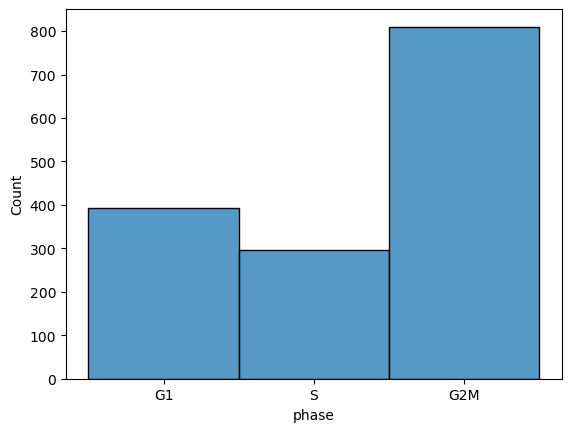

In [28]:
sns.histplot(train["phase"])
plt.show()

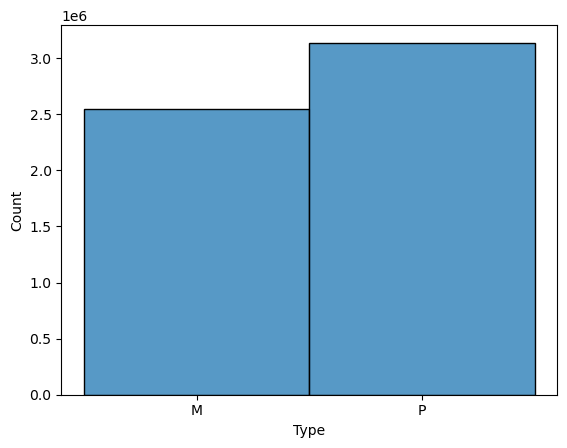

In [37]:
m = contact["chr1"].str.endswith("M").sum()
p = contact["chr1"].str.endswith("P").sum()

m_p = pd.DataFrame({"Type": ["M", "P"], "Count": [m, p]})

sns.histplot(data=m_p, x="Type", weights="Count", bins=2)
plt.show()

In [43]:
contact["dist1"] = contact["end1"] - contact["start1"]
contact["dist2"] = contact["end2"] - contact["start2"]

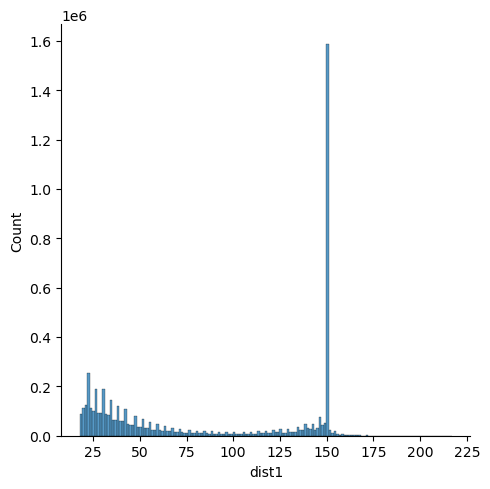

In [ ]:
sns.displot(contact["dist1"])

plt.show()

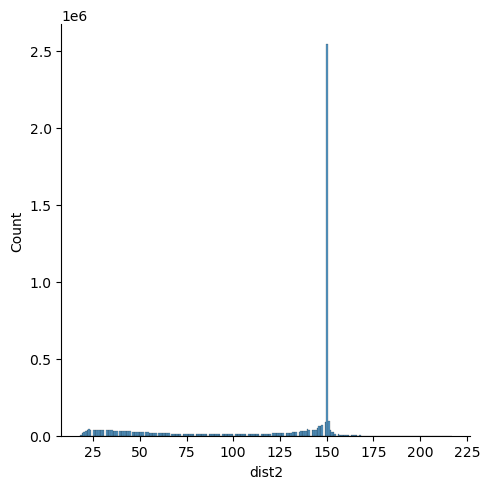

In [44]:
sns.displot(contact["dist2"])

plt.show()

## Contact dataset dictionary:

- **cellid**: Unique identifier for the cell (matches train/test data)
- **chr1**: Chromosome/location of the first region (e.g., chr13-M, chr7-P)
- **chr2**: Chromosome/location of the second region
- **start1/end1**: Genomic coordinates for the first region
- **start2/end2**: Genomic coordinates for the second region

In [ ]:
contact["chr1"].unique()

array(['chr13-M', 'chr1-M', 'chr2-M', 'chr7-P', 'chr6-M', 'chr16-P',
       'chr2-P', 'chr10-P', 'chr11-M', 'chr1-P', 'chr13-P', 'chr6-P',
       'chrX-M', 'chr8-P', 'chr3-P', 'chr3-M', 'chr5-P', 'chr16-M',
       'chr15-P', 'chr12-P', 'chr4-M', 'chr10-M', 'chr18-M', 'chr11-P',
       'chr5-M', 'chrX-P', 'chr15-M', 'chr14-P', 'chr19-P', 'chr7-M',
       'chr19-M', 'chr17-P', 'chr9-M', 'chr8-M', 'chr14-M', 'chr17-M',
       'chr9-P', 'chr12-M', 'chr18-P', 'chr4-P'], dtype=object)

In [21]:
print(len(contact["chr1"].unique()))

40


In [23]:
print(len(contact["chr2"].unique()))

40


In [26]:
len(contact["cellid"].unique())

1881